In [1]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import shutil
import seaborn as sns


In [2]:

project='EN1_rerun3'
study_name='value11b'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\studies'
plot_path = os.path.join(base_path,project,'outputs',study_name,'plots\\boxplots')

# Scenario files:
# **************
spath = os.path.join(base_path, project,'outputs',study_name,'scenarios')


In [3]:
ll = [['en_pv', 'en'],
                            ['btm_i_c'],
                            ['btm_i_u'],
                            ['btm_s_c','btm_p_c'],
                            ['btm_s_u','btm_p_u'],
                            ['cp_only']]
for types in ll:
    arr_label = types[0][0:7]
    print(arr_label)

en_pv
btm_i_c
btm_i_u
btm_s_c
btm_s_u
cp_only


In [4]:
# master results file with additional processingt (NPV, etc)
# ********************************************************
fn = os.path.join(base_path, project,'outputs',study_name, study_name+'_results_process.csv')
df = pd.read_csv(fn,index_col = [0])


In [5]:
sites = ['A','E',  'D','B', 'H', 'I', 'G', 'C',  'J', 'F' ]
values1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ordered_sites = dict(zip(sites,values1))

dict_tags = {'A': 'a208_f12_cp34',
 'B': 'a104_f8_cp57',
 'C': 'a34_f4_cp33',
 'D': 'a138_f9_cp44',
 'E': 'a161_f7_cp38',
 'F': 'a20_f5_cp36',
 'G': 'a44_f4_cp17',
 'H': 'a52_f3_cp26',
 'I': 'a48_f4_cp09',
 'J': 'a26_f4_cp43'}

tags = list(dict_tags.values())
pv_lookup = {np.nan: 0,
             'site_A_max.csv': 0.23,
             'site_B_max.csv': 0.18,
             'site_C_max.csv': 0.28,
             'site_D_max.csv': 0.31,
             'site_E_max.csv': 0.56,
             'site_F_max.csv': 1.58,
             'site_F_0_5kw.csv': 0.5,
             'site_F_1_0kw.csv': 1.0,
             'site_G_max.csv': 1.74,
             'site_G_0_5kw.csv': 0.5,
             'site_G_1_0kw.csv': 1.0,
             'site_G_1_5kw.csv': 1.5,
             'site_H_max.csv': 2.72,
             'site_H_0_5kw.csv': 0.5,
             'site_H_1_0kw.csv': 1.0,
             'site_H_1_5kw.csv': 1.5,
             'site_H_2_0kw.csv': 2.0,
             'site_H_2_5kw.csv': 2.5,
             'site_I_max.csv': 1.09,
             'site_I_0_5kw.csv': 0.5,
             'site_I_1_0kw.csv': 1.0,
             'site_J_max.csv': 3.02,
             'site_J_0_5kw.csv': 0.5,
             'site_J_1_0kw.csv': 1.0,
             'site_J_1_5kw.csv': 1.5,
             'site_J_2_0kw.csv': 2.0,
             'site_J_2_5kw.csv': 2.5}
tag_list= list(dict_tags.values())
numunits={'A':208,'E':161, 'D':138,'B':104,'H':52,'I':48,'G':44,'C':34,'J':26,'F':20}
sites_grouped={'all': sites,
              'group1': [s for s in sites if s in ['A','B','D','E']],
              'group2': [s for s in sites if s in['C','F', 'G','H','I','J']]}

In [6]:
# Select parameters for plot:
arrangement = 'en_pv'
a_term = 20
parent_retail = 'TOU12_FIT8'
en_capex_id = 'capex_med'

In [7]:
# Lose max PV, so only multiples of 0.5 kWp/unit:
df1 = df[~df['pv_filename'].fillna('').str.contains('max')]

In [8]:
dfx = df1.copy().loc[(df1['arrangement'] == arrangement) & \
                    (df1['a_term']==a_term)&\
                    (df1['parent_retail']==parent_retail) &\
                    (df1['en_capex_id']==en_capex_id)]
dfbau=df1.copy().loc[(df1['arrangement'] == 'bau') & \
                    (df1['a_term']==a_term)]
dfx = dfx.append(dfbau)

In [9]:
dfo = pd.DataFrame(columns=['site', 'kwp_unit', 'npv_cf_bau_pa'])
for s in dfx.index:
    #s = dfx.index.tolist()[0]
    pv = dfx.loc[s,'kwp_unit']
    site = dfx.loc[s,'site']
    sf = os.path.join(spath,study_name +'_'+str(s).zfill(3)+'.csv')
    ds = pd.read_csv(sf)
    bau_scenario = dfx.loc[(dfx['site']==site) & \
                          (dfx['arrangement']=='bau') & \
                           (dfx['a_term']==a_term)].index.values[0]
    
    bauf = os.path.join(spath,study_name +'_'+str(bau_scenario).zfill(3)+'.csv')
    dbau = pd.read_csv(bauf)
    for vb in ds.index:
        i = str(s) + '_' + str(vb)
        npv_bau_unit = (ds.loc[vb,'eno$_npv_building']- dbau.loc[vb,'eno$_npv_building'])/ numunits[site]
        dfo.loc[i]= [site,pv, npv_bau_unit / a_term ]

In [17]:
dfo.head()

,site,kwp_unit,npv_cf_bau_pa
2693_0,F,0.5,-116.369373
2693_1,F,0.5,-70.811038
2693_2,F,0.5,-114.462263
2693_3,F,0.5,-108.225209
2693_4,F,0.5,-75.622270


In [10]:
alpha = 0.6
size =2

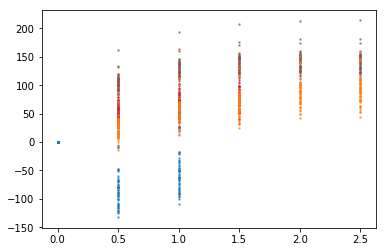

In [11]:
# Plotting npv cf bau for en_pv scatter
# --------------------------------------------
fig, ax = plt.subplots()
cmap = mpl.cm.tab10_r

patches = {}
for site in sites:
    colour = cmap(ordered_sites[site]-1)
    s = ax.scatter(dfo.loc[dfo['site'] == site,'kwp_unit'], dfo.loc[dfo['site'] == site,'npv_cf_bau_pa'], cmap=cmap, color = colour, s=size, alpha=alpha)
    patches[site] = mpl.patches.Patch(color=colour, label=dict_tags[site])

In [12]:
group2= [s for s in sites if s in['F', 'G','H','I','J']]

In [13]:
# for site in group2:
#     #fig, ax = plt.subplots()
    
#     dx = dfo.copy().loc[dfo.site==site].drop('site',axis=1)
#     print(site,dx.shape)
#     dx.boxplot(by='kwp_unit')

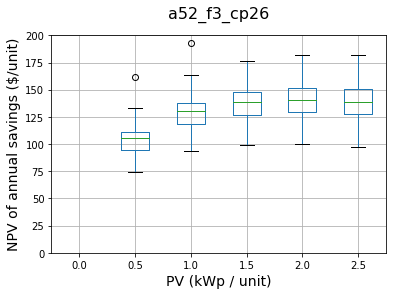

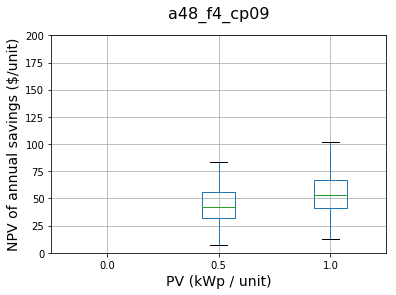

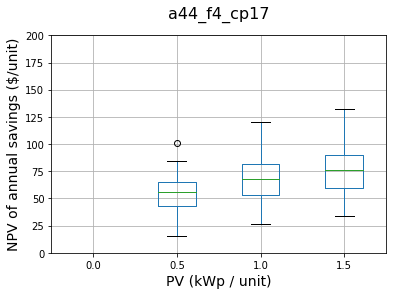

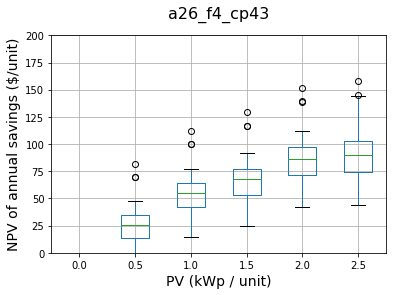

In [14]:

for site in group2[0:-1]:
    fig, ax = plt.subplots()
    dx = dfo.copy().loc[dfo.site==site].drop('site',axis=1)
    
    df2 = dx.pivot(columns=dx.columns[0], index=dx.index)
    df2.columns = df2.columns.droplevel()
    df2.boxplot()
    
    ax.set_ylim((0,200))
    title = dict_tags[site]
    ax.set_title(title, fontsize=16, y=1.05)
    ax.set_xlabel("PV (kWp / unit)", fontsize=14)
    ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)

C:\Users\z5044992\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


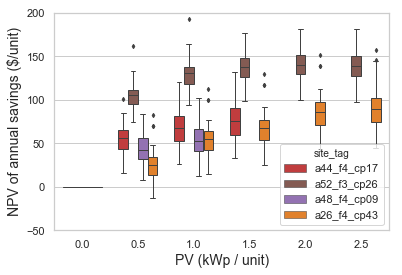

In [15]:
# Use seaborn - boxplot:
sns.set(style="whitegrid")
cmap = mpl.cm.tab10_r
colours = [cmap(sites.index(site)) for site in [ 'G', 'H', 'I',  'J' ]]
colourp = sns.color_palette(palette=colours)

dfx = dfo[dfo['site'].isin(['G','H','I','J'])]


dfx['site_tag'] = dfx['site'].apply(lambda x : dict_tags[x])
ax = sns.boxplot(data=dfx, x = 'kwp_unit', y= 'npv_cf_bau_pa', hue ='site_tag', 
                 dodge=True, linewidth = 1, width=0.7,
                fliersize =3, notch = False,
                palette = colourp)


# for site in group2[0:-1]:
# fig, ax = plt.subplots()
# dx = dfo.copy().loc[dfo.site==site].drop('site',axis=1)

# df2 = dx.pivot(columns=dx.columns[0], index=dx.index)
# df2.columns = df2.columns.droplevel()
# df2.boxplot()

ax.set_ylim((-50,200))

#ax.set_title(title, fontsize=16, y=1.05)
ax.set_xlabel("PV (kWp / unit)", fontsize=14)
ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)
plotFile= os.path.join(plot_path, 'group2_npv_pv.jpg')
plt.savefig(plotFile,dpi=1000)

In [16]:
dfx

,site,kwp_unit,npv_cf_bau_pa,site_tag
3778_0,G,0.5,39.315440,a44_f4_cp17
3778_1,G,0.5,44.625929,a44_f4_cp17
3778_2,G,0.5,69.989506,a44_f4_cp17
3778_3,G,0.5,57.491794,a44_f4_cp17
3778_4,G,0.5,41.662874,a44_f4_cp17
3778_5,G,0.5,58.326530,a44_f4_cp17
3778_6,G,0.5,70.425228,a44_f4_cp17
3778_7,G,0.5,57.456424,a44_f4_cp17
3778_8,G,0.5,15.498357,a44_f4_cp17
3778_9,G,0.5,60.567181,a44_f4_cp17


In [ ]:
# Now sort data for npv vs a_term for fixed kWp

# Lose max PV, so only multiples of 0.5 kWp/unit:
df1 = df[~df['pv_filename'].fillna('').str.contains('max')]
# Select parameters for plot:
arrangement = 'en_pv'
#a_term = 20
parent_retail = 'TOU12_FIT8'
en_capex_id = 'capex_med'
pv = 1.0

dfx = df1.copy().loc[(df1['arrangement'] == arrangement) & \
                    (df1['kwp_unit']==pv)&\
                    (df1['parent_retail']==parent_retail) &\
                    (df1['en_capex_id']==en_capex_id)]
dfbau=df1.copy().loc[(df1['arrangement'] == 'bau')]
dfx = dfx.append(dfbau)

dfo = pd.DataFrame(columns=['site', 'a_term', 'npv_cf_bau_pa'])
for s in [s for s in dfx.index if dfx.loc[s,'arrangement']=='en_pv']:
    #s = dfx.index.tolist()[0]
    a_term = dfx.loc[s,'a_term']
    site = dfx.loc[s,'site']
    sf = os.path.join(spath,study_name +'_'+str(s).zfill(3)+'.csv')
    ds = pd.read_csv(sf)
    bau_scenario = dfx.loc[(dfx['site']==site) & \
                          (dfx['arrangement']=='bau') & \
                           (dfx['a_term']==a_term)].index.values[0]
    
    bauf = os.path.join(spath,study_name +'_'+str(bau_scenario).zfill(3)+'.csv')
    dbau = pd.read_csv(bauf)
    for vb in ds.index:
        i = str(s) + '_' + str(vb)
        npv_bau_unit = (ds.loc[vb,'eno$_npv_building']- dbau.loc[vb,'eno$_npv_building'])/ numunits[site]
        dfo.loc[i]= [site,a_term, npv_bau_unit/ a_term]


In [ ]:
# And plot as boxplot with a_term as categorical x-axis
# Use seaborn - boxplot:
sns.set(style="whitegrid")
cmap = mpl.cm.tab10_r
colours = [cmap(sites.index(site)) for site in [ 'F','G', 'H', 'I',  'J' ]]
colourp = sns.color_palette(palette=colours)

dfp = dfo[dfo['site'].isin(['F','G','H','I','J'])]


dfp['site_tag'] = dfp['site'].apply(lambda x : dict_tags[x])
ax = sns.boxplot(data=dfp, x = 'a_term', y= 'npv_cf_bau_pa', hue ='site_tag', 
                 dodge=True, linewidth = 1, width=0.7,
                fliersize =3, notch = False,
                palette = colourp)


# for site in group2[0:-1]:
# fig, ax = plt.subplots()
# dx = dfo.copy().loc[dfo.site==site].drop('site',axis=1)

# df2 = dx.pivot(columns=dx.columns[0], index=dx.index)
# df2.columns = df2.columns.droplevel()
# df2.boxplot()

ax.set_ylim((-300,250))

ax.set_title('PV = 1kWp/unit', fontsize=16, y=1.05)
ax.set_xlabel("Term (years))", fontsize=14)
ax.set_ylabel("NPV of annual savings($/unit)", fontsize=14)
plotFile= os.path.join(plot_path, 'group2_npv_term.jpg')
plt.savefig(plotFile,dpi=1000)

In [ ]:
# As above for max PV and all sites
# Lose all except  max PV, 

# Select parameters for plot:
arrangement = 'en_pv'
#a_term = 20
parent_retail = 'TOU12_FIT8'
en_capex_id = 'capex_med'

for group in ['group2', 'group1','all']: #,'all']:
    fig, ax = plt.subplots()
    df1 = df.copy()
    df1 = df1[df1['site'].isin(sites_grouped[group])]
    dfx =df1[df1['pv_filename'].fillna('').str.contains('max')]\
                        .loc[(df['arrangement'] == arrangement) & \
                        (df['parent_retail']==parent_retail) &\
                        (df['en_capex_id']==en_capex_id)]
    dfbau=df1.copy().loc[(df['arrangement'] == 'bau')]
    dfx = dfx.append(dfbau)

    dfo = pd.DataFrame(columns=['site', 'a_term', 'npv_cf_bau_pa'])
    for s in [s for s in dfx.index if dfx.loc[s,'arrangement']=='en_pv']:
        #s = dfx.index.tolist()[0]
        a_term = dfx.loc[s,'a_term']
        site = dfx.loc[s,'site']
        sf = os.path.join(spath,study_name +'_'+str(s).zfill(3)+'.csv')
        ds = pd.read_csv(sf)
        bau_scenario = dfx.loc[(dfx['site']==site) & \
                              (dfx['arrangement']=='bau') & \
                               (dfx['a_term']==a_term)].index.values[0]

        bauf = os.path.join(spath,study_name +'_'+str(bau_scenario).zfill(3)+'.csv')
        dbau = pd.read_csv(bauf)
        for vb in ds.index:
            i = str(s) + '_' + str(vb)
            npv_bau_unit = (ds.loc[vb,'eno$_npv_building']- dbau.loc[vb,'eno$_npv_building'])/ numunits[site]
            dfo.loc[i]= [site,a_term, npv_bau_unit /a_term]

    # And plot as boxplot with a_term as categorical x-axis
    # Use seaborn - boxplot:
    sns.set(style="whitegrid")
    cmap = mpl.cm.tab10_r
    colours = [cmap(sites.index(site)) for site in sites_grouped[group]]
    colourp = sns.color_palette(palette=colours)
    dfp = dfo[dfo['site'].isin(sites_grouped[group])]


    dfp['site_tag'] = dfp['site'].apply(lambda x : dict_tags[x])
    ax = sns.boxplot(data=dfp, x = 'a_term', y= 'npv_cf_bau_pa', hue ='site_tag', 
                     dodge=True, linewidth = 1, width=0.7,
                    fliersize =3, notch = False,
                    palette = colourp)


    # for site in group2[0:-1]:
    # fig, ax = plt.subplots()
    # dx = dfo.copy().loc[dfo.site==site].drop('site',axis=1)

    # df2 = dx.pivot(columns=dx.columns[0], index=dx.index)
    # df2.columns = df2.columns.droplevel()
    # df2.boxplot()

    if group == 'group1':
        ax.set_ylim((0,450))
    if group == 'group2':
        ax.set_ylim((-500,200))
    if group == 'all':
        ax.set_ylim((-500,450))

    ax.set_title('Max PV', fontsize=16, y=1.05)
    ax.set_xlabel("Term (years))", fontsize=14)
    ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)

    #Legends outside box and resize chart to fit
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plotFile= os.path.join(plot_path, group+'_npv_maxpv_term.jpg')
    plt.savefig(plotFile,dpi=1000)

In [ ]:
# box plot for 3 capex scenarios, max pv, a_term =20

#  and all sites
# Lose all except  max PV, 
en_capexes = ['capex_low', 'capex_med', 'capex_high']
# Select parameters for plot:
arrangement = 'en_pv'
a_term = 20
parent_retail = 'TOU12_FIT8'
# en_capex_id = 'capex_med'

group = 'all' # in ['group2', 'group1','all']: #,'all']:

fig, ax = plt.subplots()
df1 = df.copy()
df1 = df1[df1['site'].isin(sites_grouped[group])]

dfx =df1[df1['pv_filename'].fillna('').str.contains('max')]\
                    .loc[(df['arrangement'] == arrangement) & \
                    (df['parent_retail']==parent_retail) &\
                    (df['a_term']==a_term)]
dfbau=df1.copy().loc[(df['arrangement'] == 'bau')]
dfx = dfx.append(dfbau)

dfo = pd.DataFrame(columns=['site', 'en_capex_id', 'npv_cf_bau_pa'])

scenarios = [s for s in dfx.index if(dfx.loc[s,'arrangement']=='en_pv') & (dfx.loc[s,'en_capex_id'] in en_capexes)]
for s in scenarios:

    a_term = dfx.loc[s,'a_term']
    en_capex_id = dfx.loc[s,'en_capex_id']
    site = dfx.loc[s,'site']
    sf = os.path.join(spath,study_name +'_'+str(s).zfill(3)+'.csv')
    ds = pd.read_csv(sf)
    bau_scenario = dfx.loc[(dfx['site']==site) & \
                          (dfx['arrangement']=='bau') & \
                           (dfx['a_term']==a_term)].index.values[0]

    bauf = os.path.join(spath,study_name +'_'+str(bau_scenario).zfill(3)+'.csv')
    dbau = pd.read_csv(bauf)
    for vb in ds.index:
        i = str(s) + '_' + str(vb)
        npv_bau_unit = (ds.loc[vb,'eno$_npv_building']- dbau.loc[vb,'eno$_npv_building'])/ numunits[site]
        dfo.loc[i]= [site,en_capex_id, npv_bau_unit /a_term]

# And plot as boxplot with a_term as categorical x-axis
# Use seaborn - boxplot:
sns.set(style="whitegrid")
cmap = mpl.cm.tab10_r
colours = [(0,0,0)]+[cmap(sites.index(site)) for site in sites]+[(0,0,0)]
colourp = sns.color_palette(palette=colours)
dfp = dfo[dfo['site'].isin(sites)]


dfp['site_tag'] = dfp['site'].apply(lambda x : dict_tags[x])

# Add a null site in order to space the boxplot properly
# plots off chart
sites = ['A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F']
ex_sites = ['Z','A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F', 'X']
dfp.loc['999_9'] = ['X', 'capex_low', -300, '']
dfp.loc['999_8'] = ['X', 'capex_med', -300, '']
dfp.loc['999_7'] = ['X', 'capex_high', -300, '']
dfp.loc['000_9'] = ['Z', 'capex_low', -300, '']
dfp.loc['000_8'] = ['Z', 'capex_med', -300, '']
dfp.loc['000_7'] = ['Z', 'capex_high', -300, '']
# Sort by sites before plotting:
dfp['site_cat'] = pd.Categorical(dfp['site'], 
    categories=['Z','A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F', 'X'], 
    ordered=True)
dfp['cap_cat']=pd.Categorical(dfp['en_capex_id'],
                              categories = en_capexes,
                              ordered=True)

dfp.sort_values(['site_cat','cap_cat'], inplace=True)

ax = sns.boxplot(data=dfp, x='en_capex_id', y= 'npv_cf_bau_pa', hue ='site_tag', 
                 dodge=True, linewidth = 0.5, width= 1.0,
                fliersize =0, notch = False,
                palette = colourp,
                whis = 'range')

ax.set_ylim((-250,400))

ax.set_title('Max PV', fontsize=16, y=1.05)
ax.set_xlabel("Capex Scenario", fontsize=14)
ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)


#Legends outside box and resize chart to fit
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plotFile= os.path.join(plot_path, 'capex_npv_maxpv.jpg')
plt.savefig(plotFile,dpi=1000)

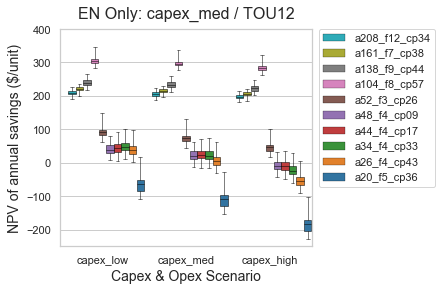

In [20]:
# box plot for 3 capex scenarios, EN ONLY (no PV), a_term =20

#  and all sites
# Lose all except en, 
en_capexes = ['capex_low', 'capex_med', 'capex_high']
# Select parameters for plot:
arrangement = 'en'
a_term = 20
parent_retail = 'TOU12_FIT8'
# en_capex_id = 'capex_med'

group = 'all' # in ['group2', 'group1','all']: #,'all']:

fig, ax = plt.subplots()
df1 = df.copy()
df1 = df1[df1['site'].isin(sites_grouped[group])]

dfx =df1\
                    .loc[(df['arrangement'] == arrangement) & \
                    (df['parent_retail']==parent_retail) &\
                    (df['a_term']==a_term)]
dfbau=df1.copy().loc[(df['arrangement'] == 'bau')]
dfx = dfx.append(dfbau)

dfo = pd.DataFrame(columns=['site', 'en_capex_id', 'npv_cf_bau_pa'])

scenarios = [s for s in dfx.index if(dfx.loc[s,'arrangement']=='en') & (dfx.loc[s,'en_capex_id'] in en_capexes)]
for s in scenarios:

    a_term = dfx.loc[s,'a_term']
    en_capex_id = dfx.loc[s,'en_capex_id']
    site = dfx.loc[s,'site']
    sf = os.path.join(spath,study_name +'_'+str(s).zfill(3)+'.csv')
    ds = pd.read_csv(sf)
    bau_scenario = dfx.loc[(dfx['site']==site) & \
                          (dfx['arrangement']=='bau') & \
                           (dfx['a_term']==a_term)].index.values[0]

    bauf = os.path.join(spath,study_name +'_'+str(bau_scenario).zfill(3)+'.csv')
    dbau = pd.read_csv(bauf)
    for vb in ds.index:
        i = str(s) + '_' + str(vb)
        npv_bau_unit = (ds.loc[vb,'eno$_npv_building']- dbau.loc[vb,'eno$_npv_building'])/ numunits[site]
        dfo.loc[i]= [site,en_capex_id, npv_bau_unit /a_term]

# And plot as boxplot with a_term as categorical x-axis
# Use seaborn - boxplot:
sns.set(style="whitegrid")
cmap = mpl.cm.tab10_r
colours = [(0,0,0)]+[cmap(sites.index(site)) for site in sites]+[(0,0,0)]
colourp = sns.color_palette(palette=colours)
dfp = dfo[dfo['site'].isin(sites)]


dfp['site_tag'] = dfp['site'].apply(lambda x : dict_tags[x])

# Add a null site in order to space the boxplot properly
# plots off chart
sites = ['A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F']
ex_sites = ['Z','A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F', 'X']
dfp.loc['999_9'] = ['X', 'capex_low', -300, '']
dfp.loc['999_8'] = ['X', 'capex_med', -300, '']
dfp.loc['999_7'] = ['X', 'capex_high', -300, '']
dfp.loc['000_9'] = ['Z', 'capex_low', -300, '']
dfp.loc['000_8'] = ['Z', 'capex_med', -300, '']
dfp.loc['000_7'] = ['Z', 'capex_high', -300, '']
# Sort by sites before plotting:
dfp['site_cat'] = pd.Categorical(dfp['site'], 
    categories=['Z','A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F', 'X'], 
    ordered=True)
dfp['cap_cat']=pd.Categorical(dfp['en_capex_id'],
                              categories = en_capexes,
                              ordered=True)

dfp.sort_values(['site_cat','cap_cat'], inplace=True)

ax = sns.boxplot(data=dfp, x='en_capex_id', y= 'npv_cf_bau_pa', hue ='site_tag', 
                 dodge=True, linewidth = 0.5, width= 1.0,
                fliersize =0, notch = False,
                palette = colourp,
                whis = 'range')

ax.set_ylim((-250,400))

ax.set_title('EN Only: capex_med / TOU12', fontsize=16, y=1.02)
ax.set_xlabel("Capex & Opex Scenario", fontsize=14)
ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)


#Legends outside box and resize chart to fit
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)
plotFile= os.path.join(plot_path, 'capex_npv_enonly.jpg')
plt.savefig(plotFile,dpi=1000)

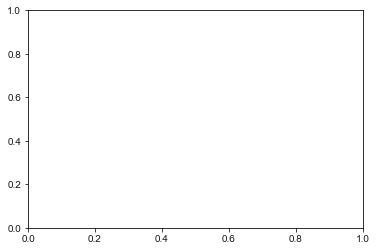

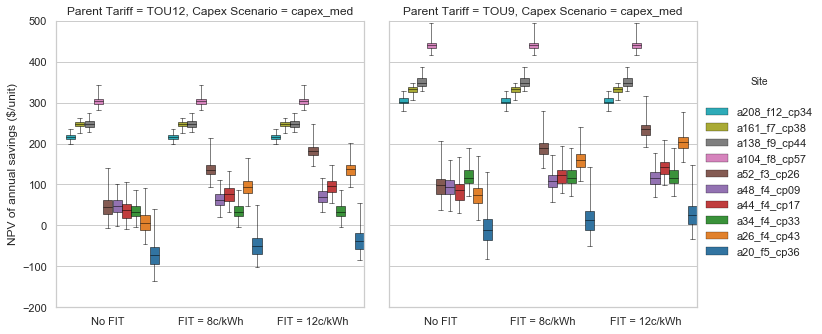

In [8]:
# box plot for different parent tariffs, MAX PV, a_term =20, capex_med

#  and all sites
# Lose all except  max PV, 
en_capex =  'capex_med'
# Select parameters for plot:
arrangement = 'en_pv'
a_term = 20
tariffs = ['TOU9', 'TOU12']
fits = ['', 'FIT8', 'FIT12']
# en_capex_id = 'capex_med'

group = 'all' # in ['group2', 'group1','all']: #,'all']:

fig, ax = plt.subplots()

df1 = df.copy()
df1 = df1[df1['site'].isin(sites_grouped[group])]

dfx =df1[df1['pv_filename'].fillna('').str.contains('max')]\
                    .loc[(df['arrangement'] == arrangement) & \
                    (df['en_capex_id']==en_capex) &\
                    (df['a_term']==a_term) &\
                       ~(df['parent'].str.contains('TOU10'))]
dfbau=df1.copy().loc[(df['arrangement'] == 'bau')]
dfx = dfx.append(dfbau)

dfo = pd.DataFrame(columns=['site', 'tariff','fit', 'npv_cf_bau_pa'])

scenarios = [s for s in dfx.index if(dfx.loc[s,'arrangement']=='en_pv') ]
for s in scenarios:

    a_term = dfx.loc[s,'a_term']
    # extract parent and fit
    t = dfx.loc[s,'parent_retail'].split('_')
    if len(t)>1:
        fit = t[1]
    else:
        fit =''
    tariff = t[0]
    
    site = dfx.loc[s,'site']
    sf = os.path.join(spath,study_name +'_'+str(s).zfill(3)+'.csv')
    ds = pd.read_csv(sf)
    bau_scenario = dfx.loc[(dfx['site']==site) & \
                          (dfx['arrangement']=='bau') & \
                           (dfx['a_term']==a_term)].index.values[0]

    bauf = os.path.join(spath,study_name +'_'+str(bau_scenario).zfill(3)+'.csv')
    dbau = pd.read_csv(bauf)
    for vb in ds.index:
        i = str(s) + '_' + str(vb)
        npv_bau_unit = (ds.loc[vb,'eno$_npv_building']- dbau.loc[vb,'eno$_npv_building'])/ numunits[site]
        dfo.loc[i]= [site,tariff, fit, npv_bau_unit /a_term]

# Plot with 2 categoricals: tariff and fit:
# And plot as boxplot with fit as x and tariff as col categoricals
# Use seaborn - catplot:
sns.set(style="whitegrid")
cmap = mpl.cm.tab10_r
colours = [(0,0,0)]+[cmap(sites.index(site)) for site in sites]+[(0,0,0)]
colourp = sns.color_palette(palette=colours)
dfp = dfo[dfo['site'].isin(sites)]


dfp['Site'] = dfp['site'].apply(lambda x : dict_tags[x])

# Add a null site in order to space the boxplot properly
# plots off chart
sites = ['A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F']
ex_sites = ['Z','A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F', 'X']
dfp.loc['999_9'] = ['X','TOU9', '', -300, '']
dfp.loc['999_8'] = ['X','TOU9', 'FIT8', -300, '']
dfp.loc['999_7'] = ['X','TOU9', 'FIT12', -300, '']
dfp.loc['000_9'] = ['Z','TOU9', '', -300, '']
dfp.loc['000_8'] = ['Z','TOU9', 'FIT8', -300, '']
dfp.loc['000_7'] = ['Z','TOU9', 'FIT12', -300, '']
dfp.loc['999_9'] = ['X','TOU12', '', -300, '']
dfp.loc['999_8'] = ['X','TOU12', 'FIT8', -300, '']
dfp.loc['999_7'] = ['X','TOU12', 'FIT12', -300, '']
dfp.loc['000_9'] = ['Z','TOU12', '', -300, '']
dfp.loc['000_8'] = ['Z','TOU12', 'FIT8', -300, '']
dfp.loc['000_7'] = ['Z','TOU12', 'FIT12', -300, '']
# Sort by sites before plotting:
dfp['site_cat'] = pd.Categorical(dfp['site'], 
    categories=['Z','A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F', 'X'], 
    ordered=True)
dfp['tar_cat']=pd.Categorical(dfp['tariff'],
                              categories = tariffs,
                              ordered=True)
dfp['fit_cat']=pd.Categorical(dfp['fit'],
                              categories = fits,
                              ordered=True)


dfp.sort_values(['site_cat','tar_cat','fit_cat'], inplace=True)

ax = sns.catplot(data=dfp, x='fit', col= 'tariff',
                 y= 'npv_cf_bau_pa', hue ='Site', 
                 kind = 'box',width = 1,
                 dodge=True, linewidth = 0.5, 
                fliersize =0, notch = False,
                palette = colourp,
                whis = 'range',
                legend=True, legend_out = True)
(ax.set_axis_labels("", "NPV of annual savings ($/unit)")\
                .set_xticklabels(["No FIT", "FIT = 8c/kWh", "FIT = 12c/kWh"])\
                .set_titles("Parent Tariff = {col_name}, Capex Scenario = capex_med")\
                .set(ylim=(0, 1))\
                .set(ylim=(-200,500))\
                .despine( right=False))

plotFile= os.path.join(plot_path, 'catplot_capex_npv_maxpv.jpg')
plt.savefig(plotFile,dpi=1000)

In [ ]:
sns.__version__

In [ ]:
arrangement

In [ ]:
dfp

In [ ]:
# Use seaborn - swarmplot - for the last boxplot above


ax = sns.swarmplot(data=dfp, x = 'a_term', y= 'npv_cf_bau_pa', hue ='site_tag', 
                 dodge=True, linewidth = 0.1,
                palette = colourp, size =2)


ax.set_ylim((-500,500))

ax.set_title('Max PV', fontsize=16, y=1.05)
ax.set_xlabel("Term (years))", fontsize=14)
ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)

#Legends outside box and resize chart to fit
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plotFile= os.path.join(plot_path, 'swarm_all_npv_maxpv.jpg')
plt.savefig(plotFile,dpi=1000)

In [ ]:
# # Use seaborn - swarmplot - 

# dfx = dfo[dfo['site'].isin([ 'G','H','I','J'])]
# dfx['site_tag'] = dfx['site'].apply(lambda x : dict_tags[x])
# ax = sns.swarmplot(data=dfx, x = 'kwp_unit', y= 'npv_bau_unit', hue ='site_tag', size = 3)


# # for site in group2[0:-1]:
# # fig, ax = plt.subplots()
# # dx = dfo.copy().loc[dfo.site==site].drop('site',axis=1)

# # df2 = dx.pivot(columns=dx.columns[0], index=dx.index)
# # df2.columns = df2.columns.droplevel()
# # df2.boxplot()

# ax.set_ylim((0,5500))
# title = dict_tags[site]
# ax.set_title(title, fontsize=16, y=1.05)
# ax.set_xlabel("PV (kWp / unit)", fontsize=14)
# # ax.set_ylabel("NPV relative to BAU ($/unit)", fontsize=14)